# 5. lekce: Cvičení

## Plocha garáže

Uvažujme nyní plochu garáže (`GarageArea`). Ovlivňuje plocha garáže cenu domu (`SalePrice`)? Ověř to pomocí korelace mezi oběma hodnotami. Dále se podívej na bodový graf obou hodnot. Je z grafu vidět rozdílná síla závislosti oproti obytné ploše domu (`GrLivArea`)? Dále zkus prověřit plochu pozemku včetně nezastavěných částí (`LotArea`).

**Vysvětlení a ukázky k síle korelace**: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html

* Uvažujme nyní plochu garáže (`GarageArea`). Ovlivňuje plocha garáže cenu domu (`SalePrice`)? Ověř to pomocí korelace mezi oběma hodnotami.

In [1]:
import pandas

data_houses = pandas.read_csv("data/house_prices.csv")

# Korelace mezi vybranými sloupci
data_houses[["GarageArea", "SalePrice"]].corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.636964
SalePrice,0.636964,1.000000


* Dále se podívej na bodový graf obou hodnot.

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

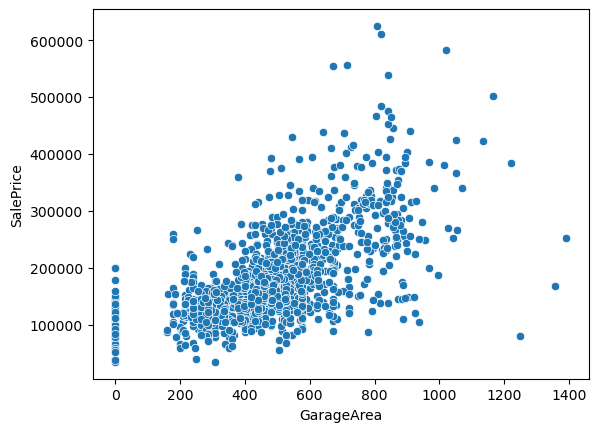

In [70]:
import seaborn

# Bodový graf
seaborn.scatterplot(data=data_houses, x="GarageArea", y="SalePrice")

# Alternativa: Bodový graf s rozložením hodnot pro každou osu
# seaborn.jointplot(data=data_houses, x="GarageArea", y="SalePrice")

# Alternativa: Bodový graf včetně proložení přímkou (lineární regrese)
# seaborn.regplot(data=data_houses, x="GarageArea", y="SalePrice")

* Je z grafu vidět rozdílná síla závislosti oproti obytné ploše domu (`GrLivArea`)?

,GrLivArea,SalePrice
GrLivArea,1.000000,0.720516
SalePrice,0.720516,1.000000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

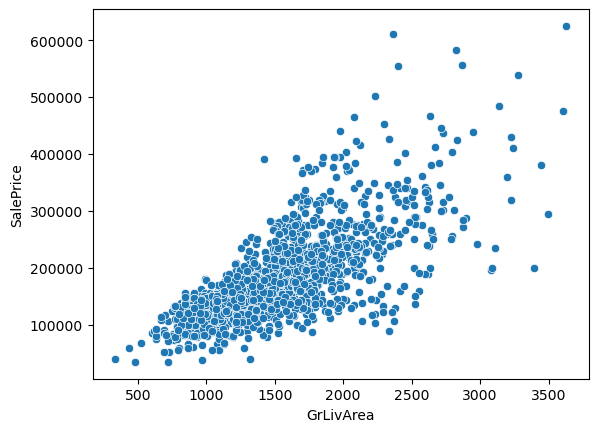

In [71]:
display( data_houses[["GrLivArea", "SalePrice"]].corr() )

seaborn.scatterplot(data=data_houses, x="GrLivArea", y="SalePrice")
# seaborn.regplot(data=data_houses, x="GrLivArea", y="SalePrice")

## Plocha pozemku

Uvažujme nyní plochu pozemku, na kterém dům stojí (`LotArea`). Ovlivňuje plocha pozemku cenu domu? Opět se podívej na hodnotu korelace mezi cenou domu a plochou pozemku a zobraz si vztah mezi hodnotami pomocí grafu. Dále se podívej na korelaci mezi plochou pozemku a obytnou plochou domu. Je zde nějaká korelace, tj. platí, že čím větší je obytná plocha domu, tím větší má tendenci být pozemek?

* Ovlivňuje plocha pozemku cenu domu?

,LotArea,SalePrice
LotArea,1.000000,0.269866
SalePrice,0.269866,1.000000


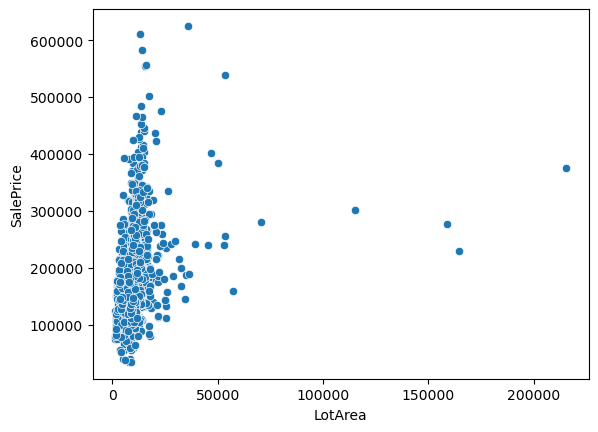

In [72]:
# Korelace mezi vybranými sloupci
display( data_houses[["LotArea", "SalePrice"]].corr() )

# Graf
g = seaborn.scatterplot(data=data_houses, x="LotArea", y="SalePrice")
# seaborn.regplot(data=data_houses, x="LotArea", y="SalePrice")

* Dále se podívej na korelaci mezi plochou pozemku a obytnou plochou domu. Je zde nějaká korelace, tj. platí, že čím větší je obytná plocha domu, tím větší má tendenci být pozemek?

,GrLivArea,LotArea
GrLivArea,1.000000,0.231887
LotArea,0.231887,1.000000


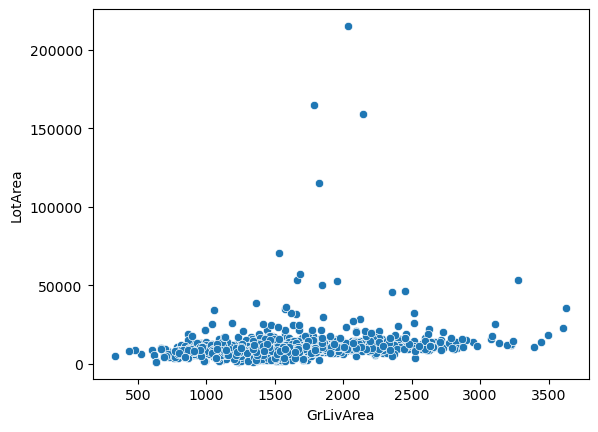

In [73]:
# Korelace mezi vybranými sloupci
display( data_houses[["GrLivArea", "LotArea"]].corr() )

# Graf
g = seaborn.scatterplot(data=data_houses, x="GrLivArea", y="LotArea")
# g.set(ylim=(0,50_000))
# ...ylim omezí rozsah osy y, ať lépe vidíme oblast s většinou hodnot (stejně funguje xlim)

### Bonus: Tabulka korelačních koeficientů a grafů pro více sloupců najednou

In [74]:
# Korelace mezi vybranými sloupci - prověříme všechny čtyři najednou
data_houses[["GarageArea", "SalePrice", "GrLivArea", "LotArea"]].corr().style.background_gradient(cmap="Blues")
# ...Výstup pro snazší orientaci nabarvíme podle hodnot

# Možnosti výběru colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

,GarageArea,SalePrice,GrLivArea,LotArea
GarageArea,1.000000,0.636964,0.454512,0.162183
SalePrice,0.636964,1.000000,0.720516,0.269866
GrLivArea,0.454512,0.720516,1.000000,0.231887
LotArea,0.162183,0.269866,0.231887,1.000000


<Axes: xlabel='GarageArea', ylabel='GarageArea'>

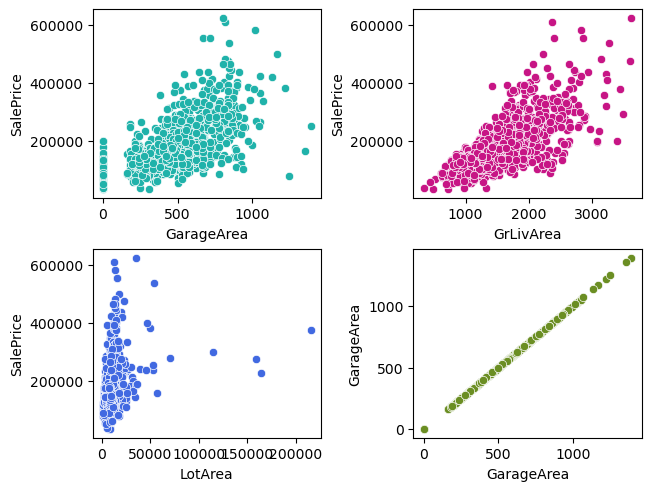

In [75]:
import matplotlib.pyplot as plt

# Připravíme "okno" (figure) se čtyřmi subploty (mřížka 2x2)
fig, axes = plt.subplots(2, 2, constrained_layout=True)
# ...constrained_layout zajistí, aby se části grafů vzájemně nepřekrývaly

# Vytvoříme čtyři barevné subploty v jednom figu
seaborn.scatterplot(data=data_houses, x="GarageArea", y="SalePrice",  color="lightseagreen",   ax=axes[0,0])
seaborn.scatterplot(data=data_houses, x="GrLivArea",  y="SalePrice",  color="mediumvioletred", ax=axes[0,1])
seaborn.scatterplot(data=data_houses, x="LotArea",    y="SalePrice",  color="royalblue",       ax=axes[1,0])
seaborn.scatterplot(data=data_houses, x="GarageArea", y="GarageArea", color="olivedrab",       ax=axes[1,1])
# ... Poslední subplot je pro ukázku dokonalé korelace (koeficient 1.0)

# Nabídka všech pojmenovaných barviček: https://matplotlib.org/stable/gallery/color/named_colors.html

# Grafy můžeme i uložit
# fig.savefig("scatterplots.png")

## Popisná statistika jednou metodou

Pandas umožňuje zobrazit všechny důležité statistické ukazatele jednou metodou, a to metodou `.describe()`, kterou můžeš použít pro jeden sloupec, více vybraných sloupců či celou tabulku. Zkus použít metodou pro sloupec `GrLivArea` a odpověz na následující otázky.

- Jaká je průměrná obytná plocha domu?
- Má většina domů větší či menší obytnou plochu než 1500 čtverečních stop?
- Dokážeš z těchto dat určit kvadratické rozpětí - rozdíl mezi 75%ním a 25%ním kvantilem. Jedná se o ukazatel polohy nebo ukazatel variability?
- V datech není rozptyl, ale je tam záhadná hodnota, která je označená jako `std`. Pokud zadáš zkratku do Google, zjistíš, že STD může znamenat sexuálně přenosné choroby, což není tento případ. Zkus třeba zadat do Google `std` v kombinaci s výrazem `pandas`. Tím se dostaneš na [tuto stránku v dokumentaci](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Tím bys zjistila, že jde o "standard deviation". Zkus nyní pomocí Google najít, co to vlastně je. Můžeš například otevřít Wikipedii, kde je stránka o tomto pojmu i v češtině.

In [76]:
# Spočítáme a zobrazíme základní statistické ukazatele
display( data_houses["GrLivArea"].describe() )
# ... 50% percentil je medián

# Spočítáme kvadratické rozpětí
descr = data_houses["GrLivArea"].describe()
quadratic_variation = descr["75%"] - descr["25%"]
print(f"GrLivArea quadratic variation: {quadratic_variation}")

count    1456.000000
mean     1506.502060
std       496.815378
min       334.000000
25%      1128.000000
50%      1458.500000
75%      1775.250000
max      3627.000000
Name: GrLivArea, dtype: float64

GrLivArea quadratic variation: 647.25
